<a href="https://colab.research.google.com/github/Ruhi-Sharmin-1/C-code/blob/main/ColorDoppler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from scipy.io import savemat
from scipy.io import loadmat
import timeit
import numpy as np

In [4]:
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [5]:
!pip install mat73
import mat73


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
loaddir_data=F"/content/gdrive/My Drive/Pros Normal 22/"
data_cdoppler = mat73.loadmat(loaddir_data + 'Pros NL22 RV 2D and Color.mat')

In [5]:
for key, value in data_cdoppler.items():
    print(key)

data
mu
temporary


In [6]:
for key, value in data_cdoppler['data'].items():
    print(key)


bcmask
circulation
colormap
delias
dt
dvdx
dvdy
dx
dy
energyLoss
energyloss
eprime_v1
eprime_v2
image
laBCMask
laMask
la_volume
lvBCMask
lvMask
lv_volume
mask
nyquist
origLAMask
origLVMask
psi
scale
velocity
viscousEnergyDissipation
viscousEnergyLoss
viscousenergyloss
wMask
w_init
x
xEnd
xStart
y
yEnd
yStart


In [7]:
for key, value in data_cdoppler['data']['velocity'].items():
    print(key)


delias
filtered
maxVect
minVect
raw


In [8]:
for key, value in data_cdoppler['data']['circulation'].items():
    print(key)


negative
positive
total


In [ ]:
data_cdoppler['data']['x'].shape

(602, 442)

In [ ]:
data_cdoppler['data']['lvMask'].shape

(602, 442, 72)

In [46]:
data_cdoppler['data']['xEnd']

array(958.)

In [ ]:
data_cdoppler['data']['velocity']['raw'].shape
#(Ny_plane, Nx_plane, Nt)

(602, 442, 72)

In [ ]:
data_cdoppler['data']['velocity']['raw'][0].shape

(442, 72)

In [ ]:
data_cdoppler['data']['bcmask'].shape


(602, 442, 72)

In [ ]:
441//2

In [ ]:
441/2

In [109]:
n_part=9
div_factor=int(np.sqrt(n_part))

In [115]:
row=9
col=9
olap=10
row_olap=int(np.ceil(row*olap/100))
col_olap=int(np.ceil(col*olap/100))
row_size=(row//div_factor)+row_olap
col_size=(col//div_factor)+col_olap

In [116]:
row_olap

1

In [117]:
for j in range(div_factor):
  for k in range(div_factor):
        if j==0:
          start_row=0
        else:
          start_row=(j*row//div_factor)-row_olap
        if k==0:
          start_col=0
        else:
          start_col=(k*col//div_factor)-col_olap
        end_row=start_row+row_size
        end_col=start_col+col_size
        print(start_row, end_row, start_col, end_col)

0 4 0 4
0 4 2 6
0 4 5 9
2 6 0 4
2 6 2 6
2 6 5 9
5 9 0 4
5 9 2 6
5 9 5 9


In [ ]:
123%4

In [ ]:
221*36

In [ ]:
flatten_echodata=twod_data_to_flat_columns(data_cdoppler['data']['velocity']['raw'])

NameError: ignored

In [ ]:
flatten_echodata.shape

NameError: ignored

In [7]:
Ny,Nx,Nt=data_cdoppler['data']['velocity']['delias'].shape

In [ ]:
Nt

72

In [8]:
delias_data=data_cdoppler['data']['velocity']['delias']

In [9]:
filtered_data=data_cdoppler['data']['velocity']['filtered']

In [10]:
pos_circulation_data=data_cdoppler['data']['circulation']['positive']
neg_circulation_data=data_cdoppler['data']['circulation']['negative']

In [11]:
max_vel_data=data_cdoppler['data']['velocity']['maxVect']
min_vel_data=data_cdoppler['data']['velocity']['minVect']

In [23]:
#https://arrayjson.com/numpy-transpose/ 
delias_data_t=np.transpose(delias_data,(2,0,1))
delias_data_t.shape
#np.transpose(data_cdoppler).shape

(72, 602, 442)

In [49]:
np.unique(data_cdoppler['data']['lvBCMask'])

array([0., 1., 2., 3.])

In [ ]:
#checking nan:
delias_data_t.max()

77.0

In [ ]:
delias_data_t.min()

-77.0

In [12]:
Xn_2d_echo=data_cdoppler['data']['x']
Yn_2d_echo=data_cdoppler['data']['y']

In [51]:
#cancelled

masked_echo = np.zeros((Ny,Nx,Nt))
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/59432324/how-to-mask-image-with-binary-mask
# Mask input image with binary mask
import cv2
for ct in range(Nt):
  masked_echo[:,:,ct] = cv2.bitwise_and(delias_data[:,:,ct], data_cdoppler['data']['lvBCMask'][:,:,ct])
  #plt('masked_echo') 


In [13]:
#mask_MRI = grid_mri['mask'].astype('bool')
mask_echo = data_cdoppler['data']['lvBCMask'].astype('bool')
#np.unique(mask_echobool)


In [53]:
mask_echo.shape

(602, 442, 72)

In [15]:
(data_cdoppler['data']['lvBCMask'][:,:,0]-data_cdoppler['data']['lvBCMask'][:,:,7]).min()

-3.0

In [14]:
j_echo, i_echo, t_echo = np.where(mask_echo==True)

In [76]:
t_echo.min()

0

In [16]:
mask_echo_int = mask_echo.astype('int')

In [17]:
delias_data_masked_keepasmatrix=delias_data*mask_echo_int

In [41]:
delias_data_masked_keepasmatrix.shape

(602, 442, 72)

In [64]:
delias_data_masked_keepasmatrix.shape

(602, 442, 72)

In [18]:
j_min_echo= np.min(j_echo)
j_max_echo = np.max(j_echo)
i_min_echo = np.min(i_echo)
i_max_echo = np.max(i_echo)

In [19]:
t_min_echo= np.min(t_echo)
t_max_echo= np.max(t_echo)

In [74]:
t_min_echo

0

In [45]:
delias_data_masked_rectangle=delias_data[j_min_echo:j_max_echo, i_min_echo:i_max_echo,:]

In [46]:
delias_data_masked_rectangle.shape

(371, 365, 72)

In [69]:
j_max_echo

471

In [68]:
i_max_echo

372

In [71]:
i_min_echo

7

In [47]:
delias_data

(602, 442, 72)

In [22]:
delias_data_masked = delias_data[j_echo, i_echo, t_echo]

In [58]:
delias_data_masked.shape

(4594101,)

In [52]:
j_echo.shape

(4594101,)

In [60]:
Xn_2d_echo.shape

(602, 442)

In [59]:
delias_data[j_echo, i_echo, t_echo].shape

(4594101,)

In [26]:
mat=np.random.randn(22,33,44)


In [23]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import patchify
#"from patchify import patchify" korle "patchify.patchify" lagbena

In [27]:
#This will split the image into small images of shape [3,3,3]

patches = patchify.patchify(mat, (3, 3, 3), step=1)

In [96]:
patches.shape

(20, 31, 42, 3, 3, 3)

In [28]:
vel_levels = np.linspace(-0.7,0.7,41)
N_skip = 3
dt=data_cdoppler['data']['dt']

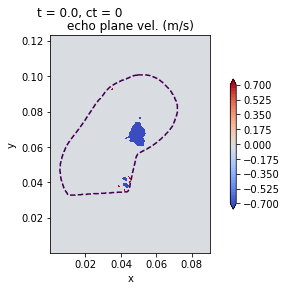

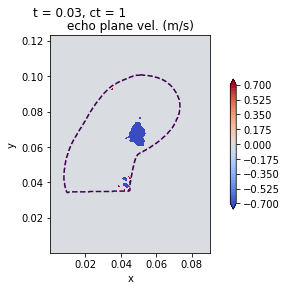

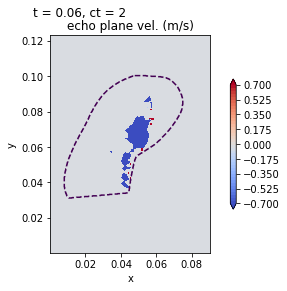

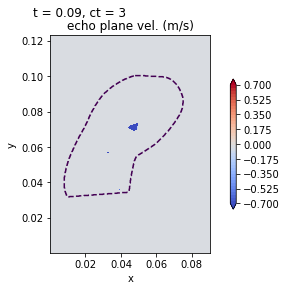

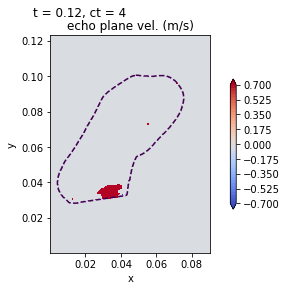

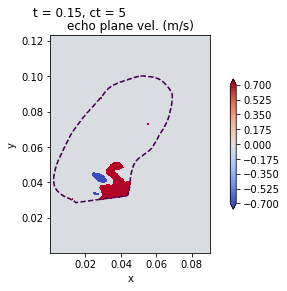

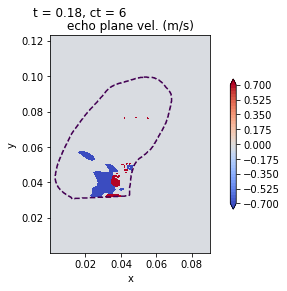

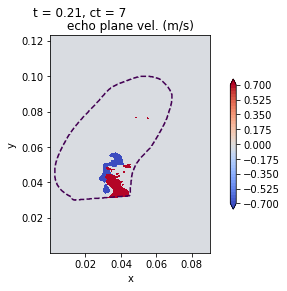

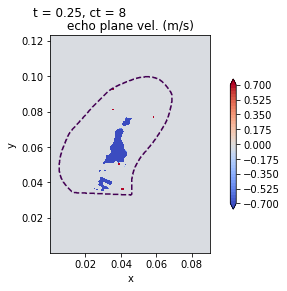

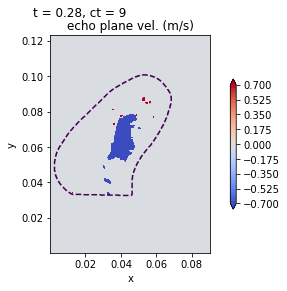

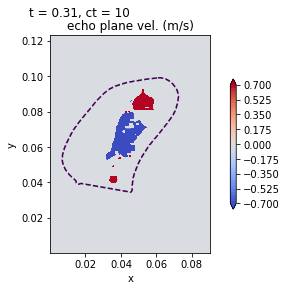

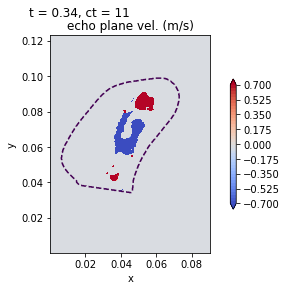

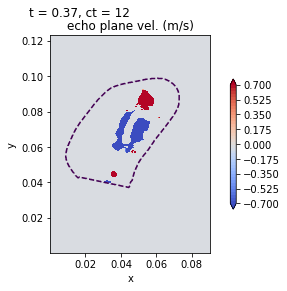

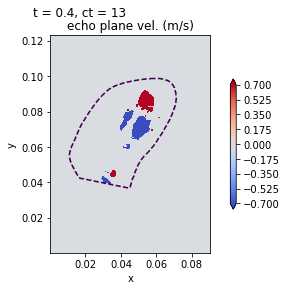

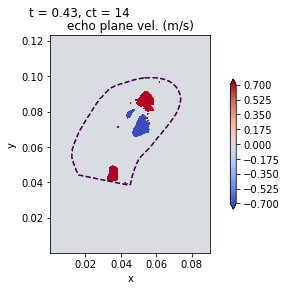

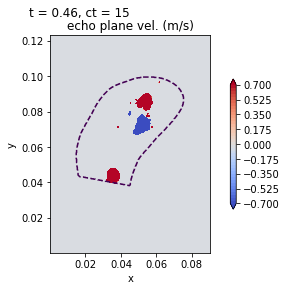

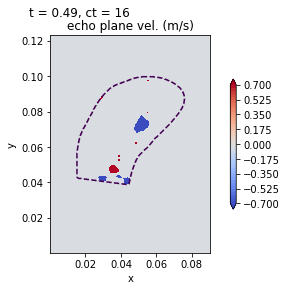

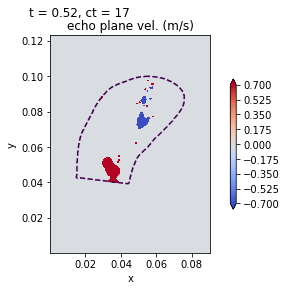

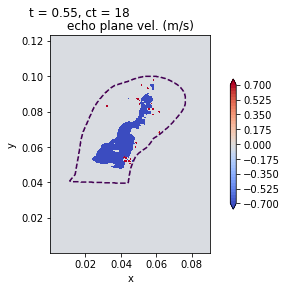

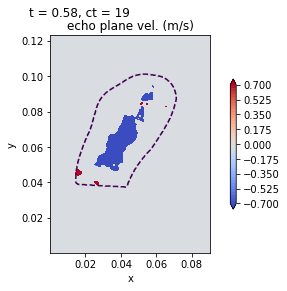

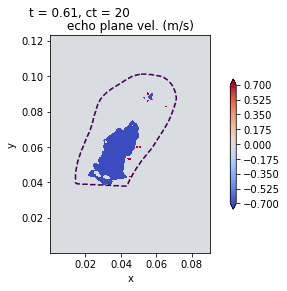

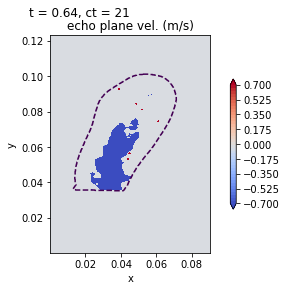

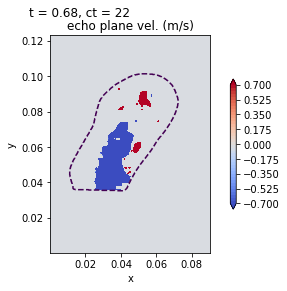

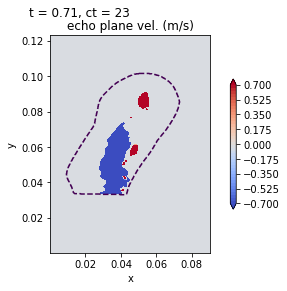

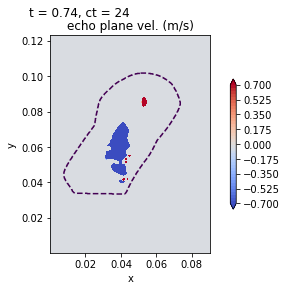

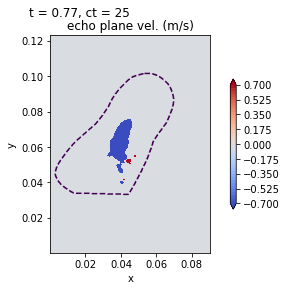

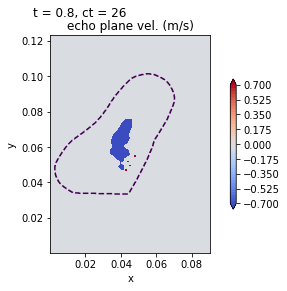

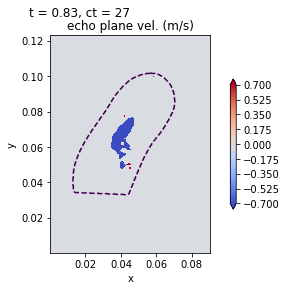

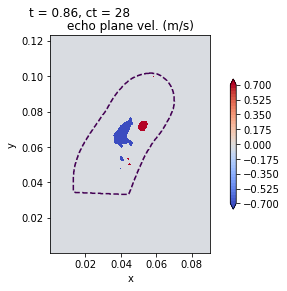

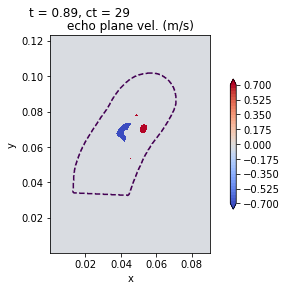

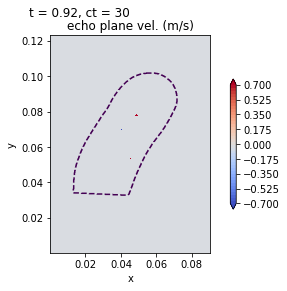

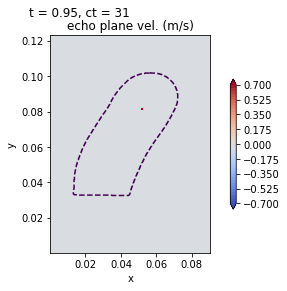

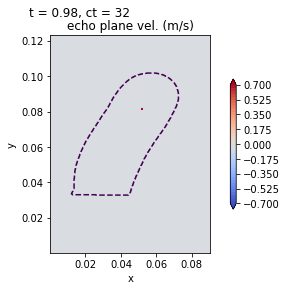

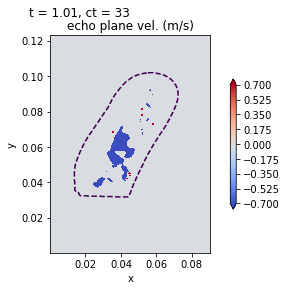

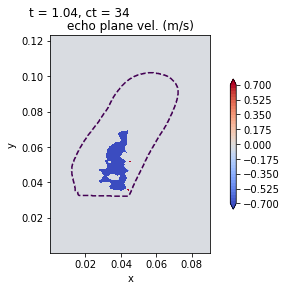

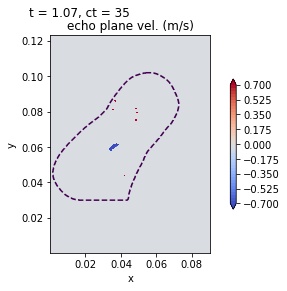

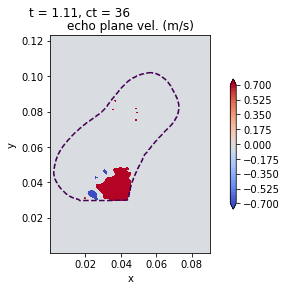

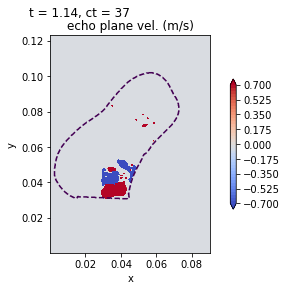

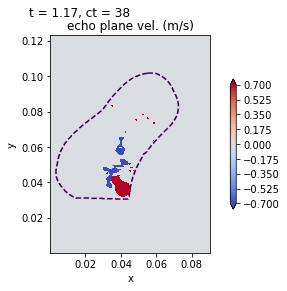

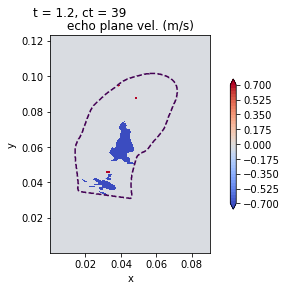

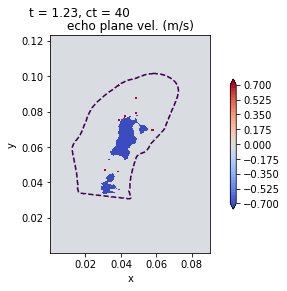

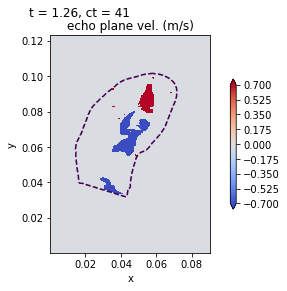

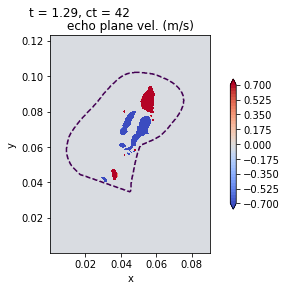

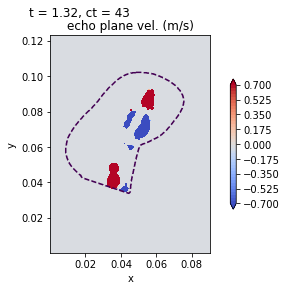

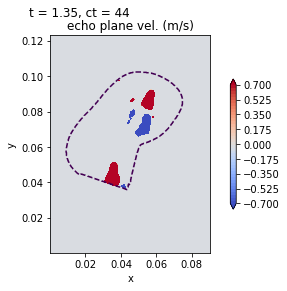

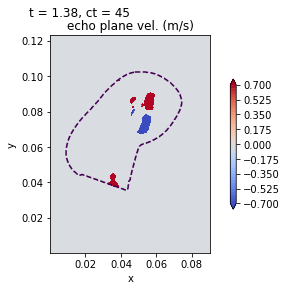

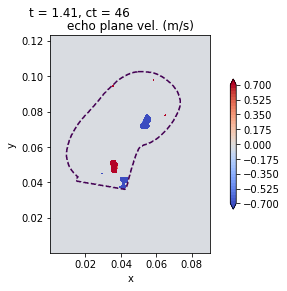

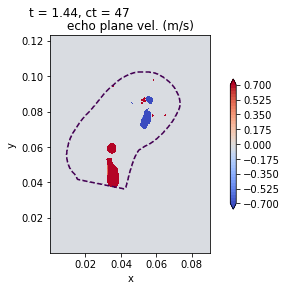

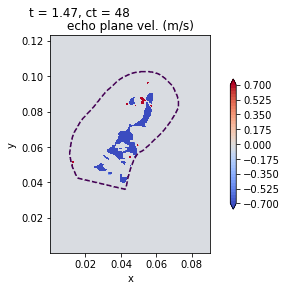

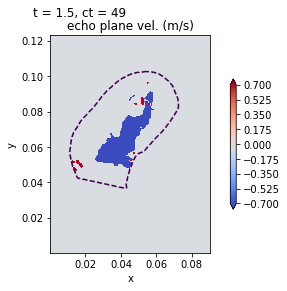

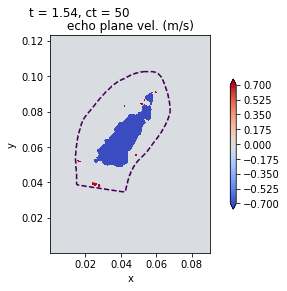

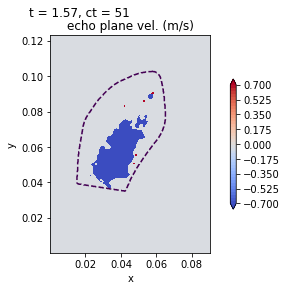

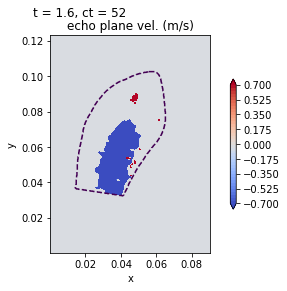

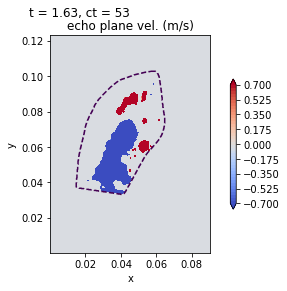

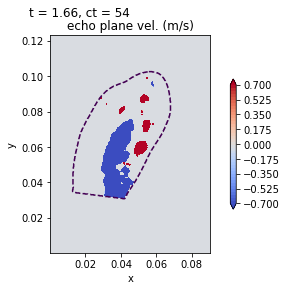

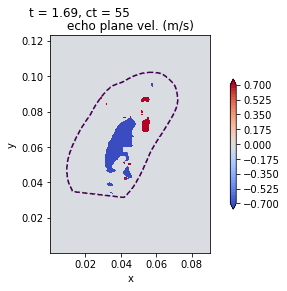

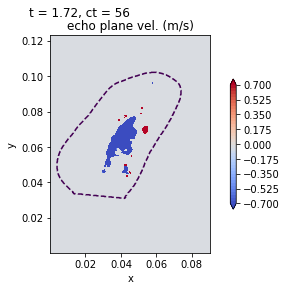

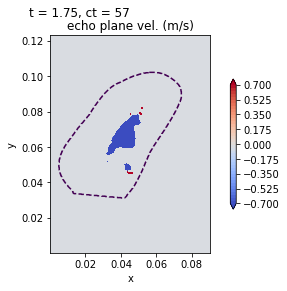

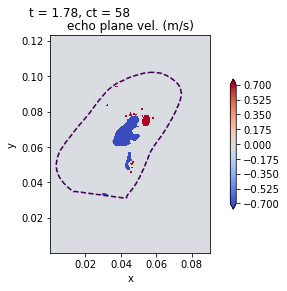

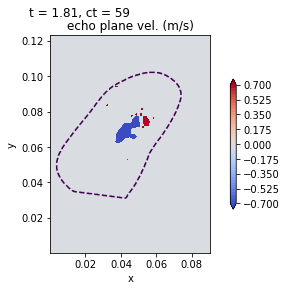

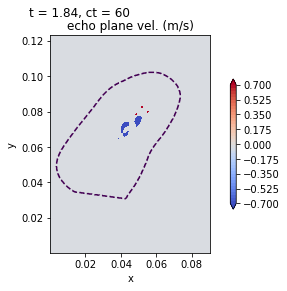

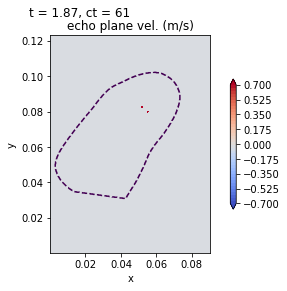

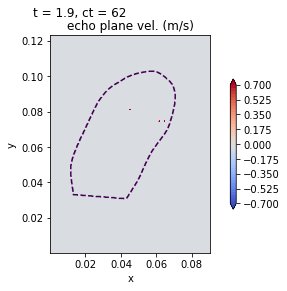

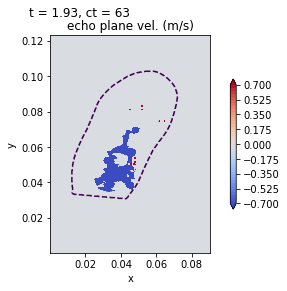

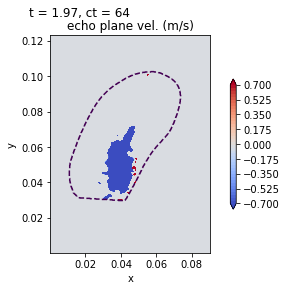

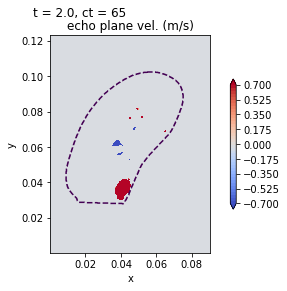

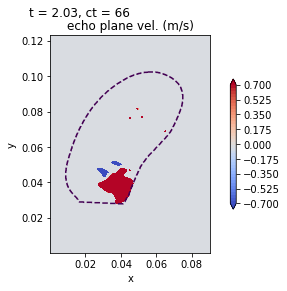

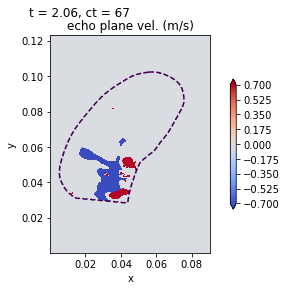

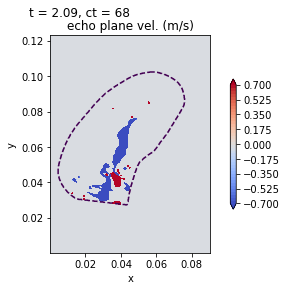

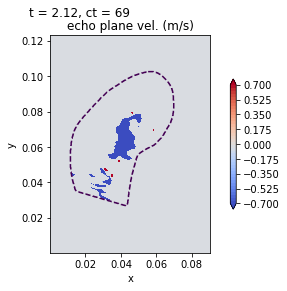

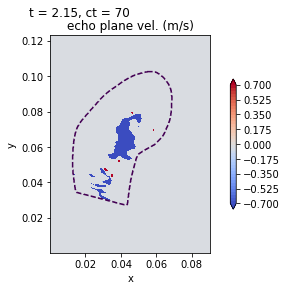

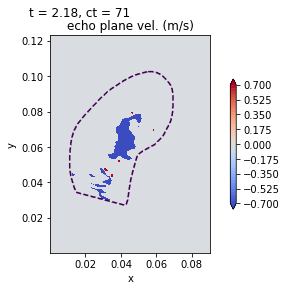

In [40]:
import matplotlib.pyplot as plt
for ct in range(Nt):
  plt.figure(1)
  ax = plt.subplot(1,1,1)
  plt.contourf(Xn_2d_echo, Yn_2d_echo, delias_data_masked_keepasmatrix[:,:,ct], levels=vel_levels, extend='both', cmap='coolwarm') #filtered_data plot korle onek smooth curve ashe since it is smoothened using Gaussian smooting function etc by Brett
  #extend='both' deate maxm and minm both velocity plotted hocche aage maxm thakate only colorbar er bottom region plot hocchilo
  plt.colorbar(shrink=0.6)
  plt.contour(Xn_2d_echo, Yn_2d_echo, data_cdoppler['data']['lvBCMask'][:,:,ct], np.array([0.5]), linestyles='dashed', zorder=3) #"lvBCMask" instead of "lvMask"
  #quiver([X, Y], U, V, [C], **kwargs). Here, X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
  #plt.quiver(Xn_2d_jc[::N_skip, ::N_skip], Yn_2d_jc[::N_skip, ::N_skip], Vproj_1_interp_jc[ct, ::N_skip, ::N_skip], Vproj_2_interp_jc[ct, ::N_skip, ::N_skip], color='k', zorder=3)
  #plt.quiver(Xn_2d_echo[::N_skip, ::N_skip], Yn_2d_echo[::N_skip, ::N_skip], max_vel_data[ct], min_vel_data[ct], color='k', zorder=3)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('echo plane vel. (m/s)')
  ax.set_aspect('equal')
  
  ax.set_aspect('equal')
  plt.suptitle('t = '+str(np.round(ct*dt, 2)) + ', ct = ' + str(ct))
  #plt.savefig(savedir_plot_patient + 'velocity_fields_'+str(ct).zfill(3),dpi=200)
  #plt.clf()
  plt.subplots_adjust(left=0.05,
                    right=0.99,
                    wspace=0.4,
                    hspace=0.9)

  plt.show()

In [30]:
def twod_data_to_flat_overlap_columns(s, n_part, olap):
  row,col, Nt= s.shape #assuming images are Ny,Nx,Nt
  row_olap=int(np.ceil(row*olap/100)) #olap means % of overlap between 2neigboring patches compared to whole image
  col_olap=int(np.ceil(col*olap/100))
  div_factor=int(np.sqrt(n_part))
  res=np.zeros(((row//div_factor+row_olap)*(col//div_factor+col_olap),Nt*n_part))
  row_size=(row//div_factor)+row_olap
  col_size=(col//div_factor)+col_olap
  patch_index=0
  for i in range(Nt):
    img=s[:,:,i]
    for j in range(div_factor):
      for k in range(div_factor):
        if j==0:
          start_row=0
        else:
          start_row=(j*row//div_factor)-row_olap
        if k==0:
          start_col=0
        else:
          start_col=(k*col//div_factor)-col_olap
        end_row=start_row+row_size
        end_col=start_col+col_size
    
        res[:,patch_index]=img[start_row:end_row,start_col:end_col].flatten()
        patch_index=patch_index+1
    
  return res

In [52]:
def twod_data_to_twod_overlap_patches(s, n_part, olap):
  row,col, Nt= s.shape #assuming images are Ny,Nx,Nt
  row_olap=int(np.ceil(row*olap/100)) #olap means % of overlap between 2neigboring patches compared to whole image
  col_olap=int(np.ceil(col*olap/100))
  div_factor=int(np.sqrt(n_part))
  res=np.zeros((Nt*n_part, (row//div_factor+row_olap),(col//div_factor+col_olap)))
  row_size=(row//div_factor)+row_olap
  col_size=(col//div_factor)+col_olap
  patch_index=0
  for i in range(Nt):
    img=s[:,:,i]
    for j in range(div_factor):
      for k in range(div_factor):
        if j==0:
          start_row=0
        else:
          start_row=(j*row//div_factor)-row_olap
        if k==0:
          start_col=0
        else:
          start_col=(k*col//div_factor)-col_olap
        end_row=start_row+row_size
        end_col=start_col+col_size
    
        res[patch_index]=img[start_row:end_row,start_col:end_col]
        patch_index=patch_index+1
    
  return res

In [34]:
patches_flatten = twod_data_to_flat_overlap_columns(delias_data_masked_rectangle[:,:,:1],4,10)

In [53]:
patches_2d = twod_data_to_twod_overlap_patches(delias_data_masked_rectangle[:,:,:1],4,10)

In [41]:
patches_2d.shape

(4, 223, 219)

In [35]:
patches_flatten.shape

(48837, 4)

In [36]:
Xn_2d_echo_masked = Xn_2d_echo[j_min_echo:j_max_echo, i_min_echo:i_max_echo]
Yn_2d_echo_masked = Yn_2d_echo[j_min_echo:j_max_echo, i_min_echo:i_max_echo]
mask_echo_cut = mask_echo[j_min_echo:j_max_echo, i_min_echo:i_max_echo, :]

In [63]:
mask_echo_cut.shape

(371, 365, 72)

In [49]:
delias_data_masked_rectangle[mask_echo_cut==False] = np.nan

In [37]:
vel_levels = np.linspace(-0.7,0.7,41)
N_skip = 3
dt=data_cdoppler['data']['dt']

In [42]:
Xn_2d_echo_masked.shape

(371, 365)

In [50]:
delias_data_masked_rectangle[:,:,1].shape

(371, 365)

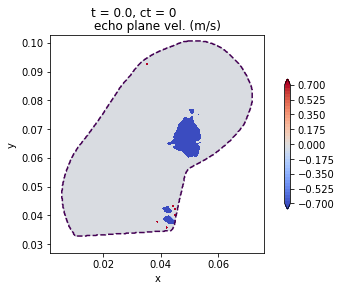

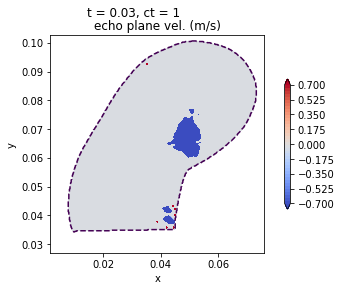

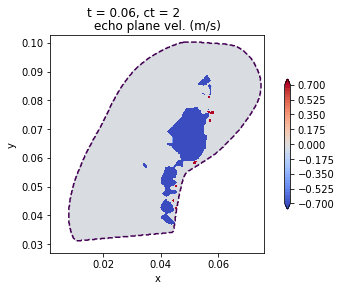

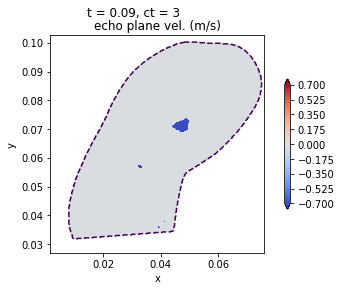

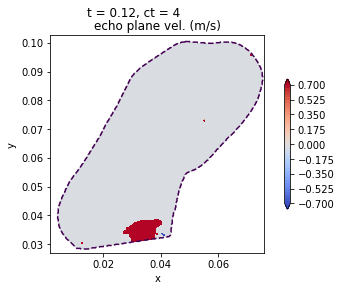

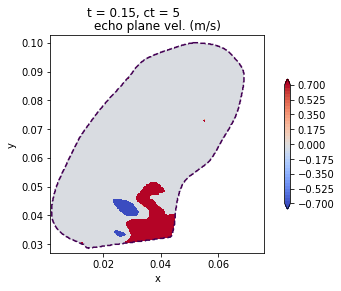

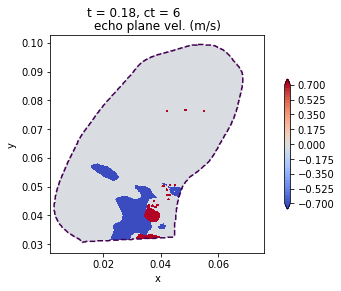

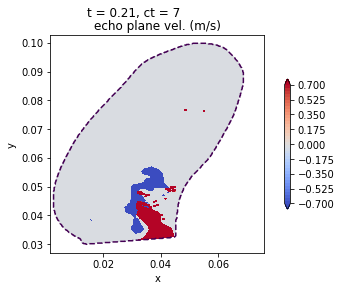

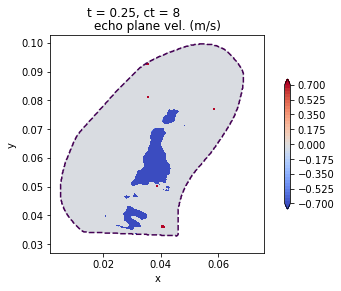

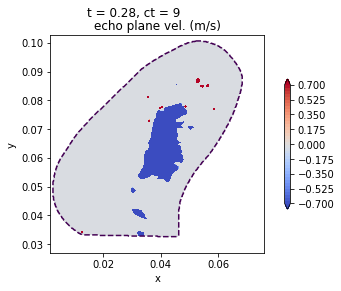

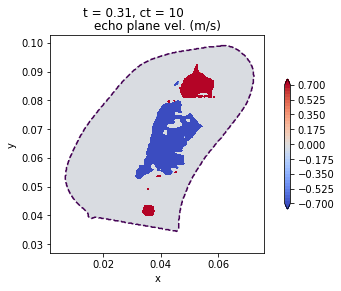

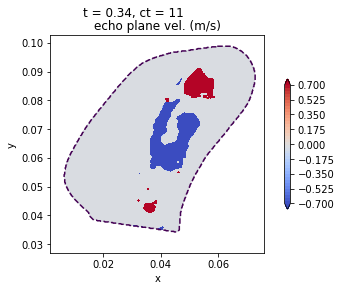

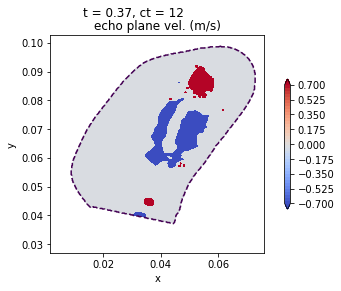

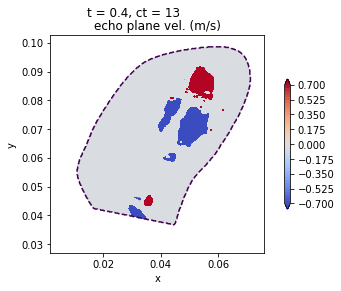

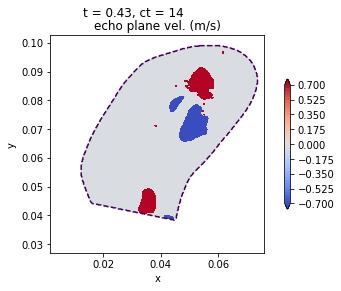

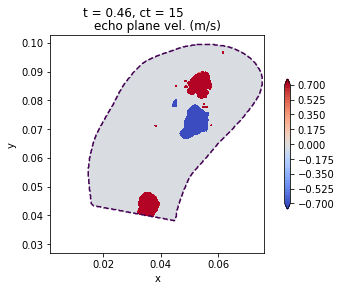

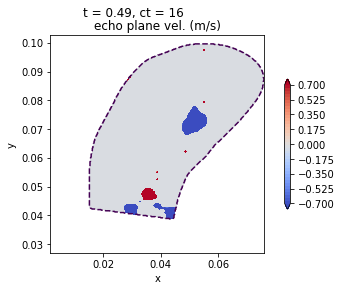

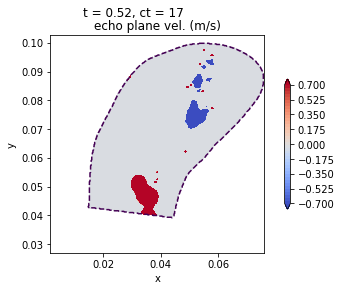

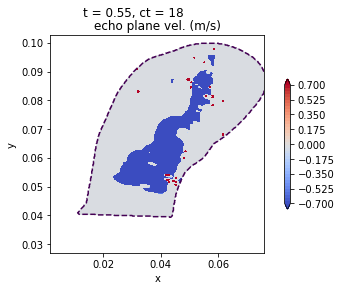

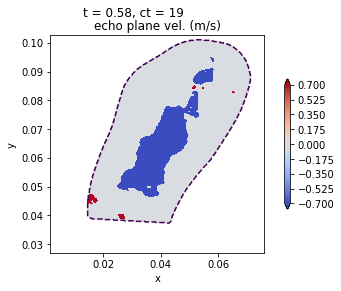

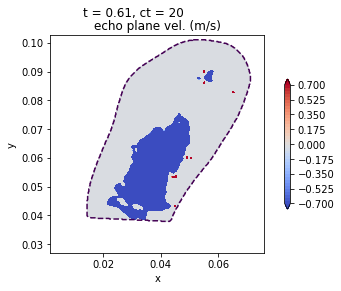

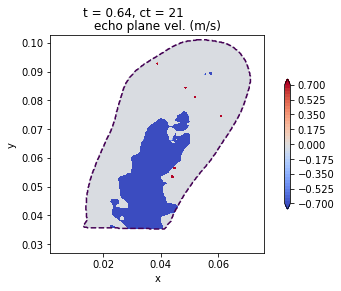

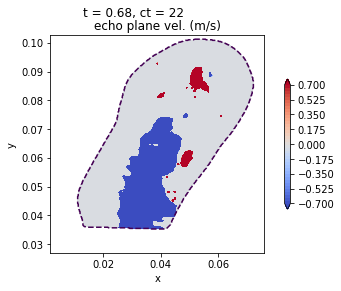

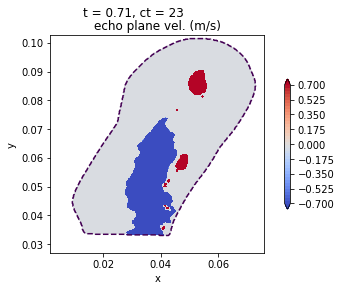

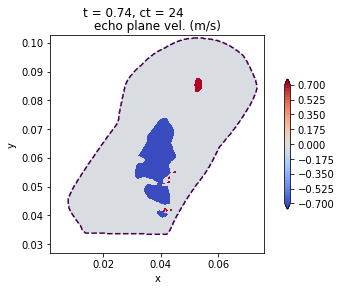

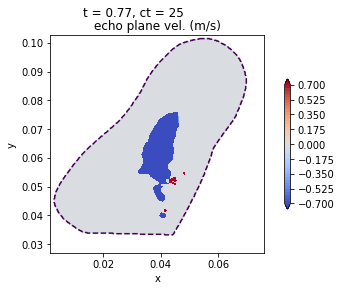

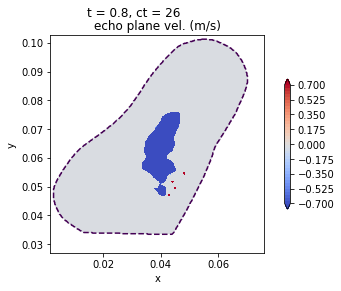

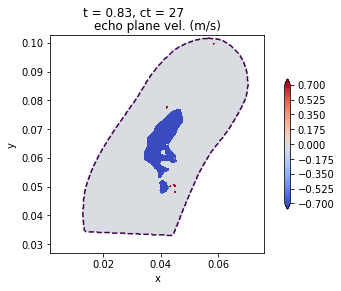

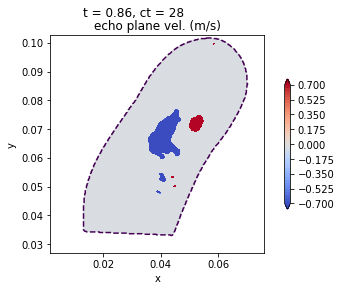

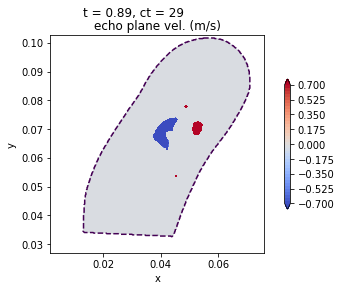

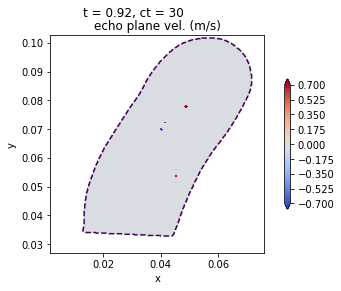

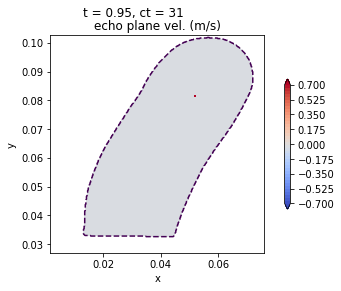

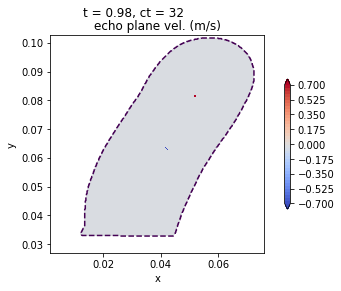

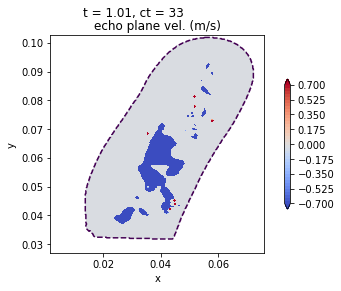

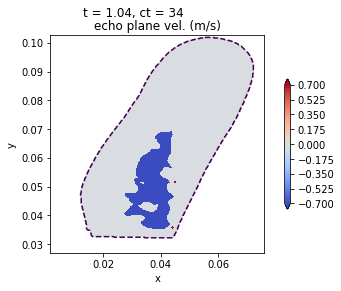

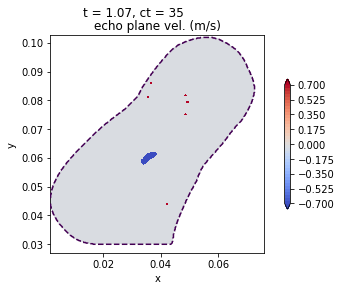

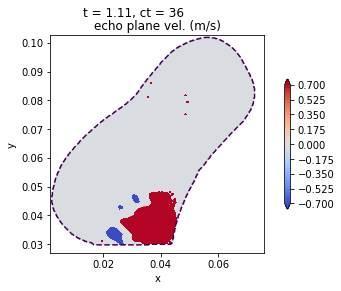

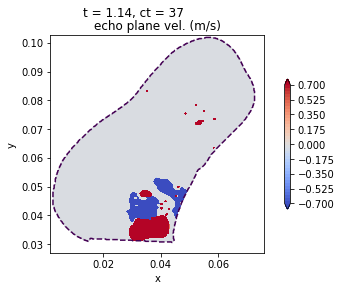

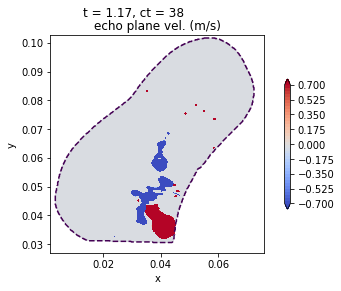

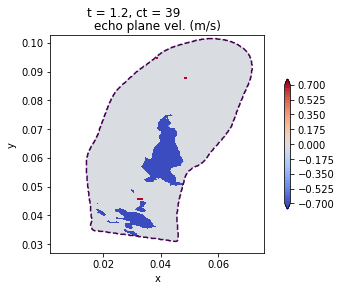

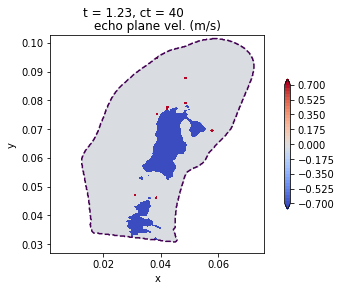

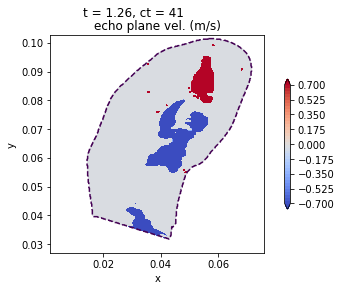

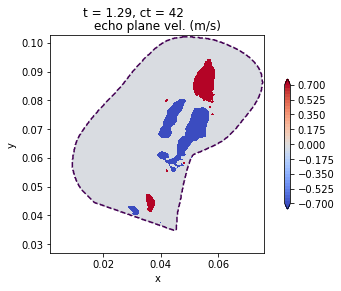

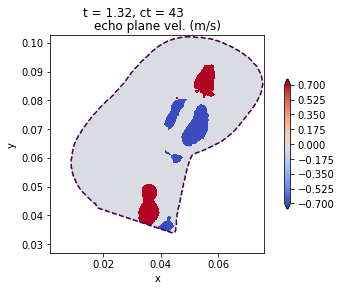

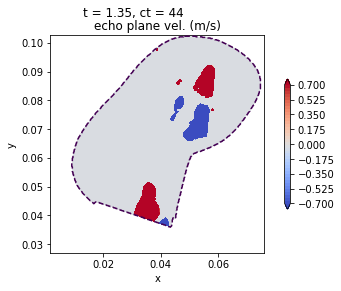

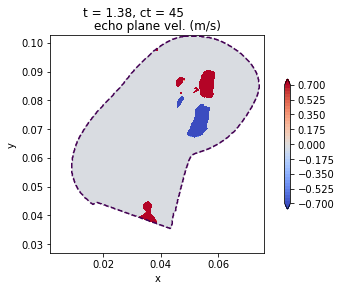

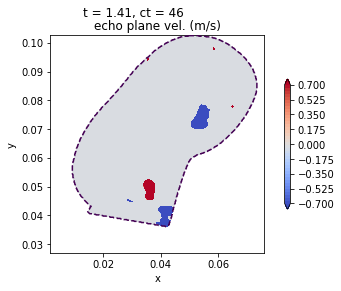

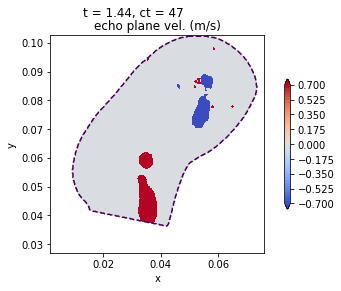

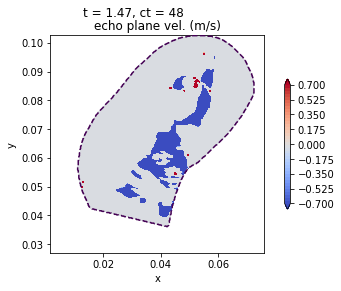

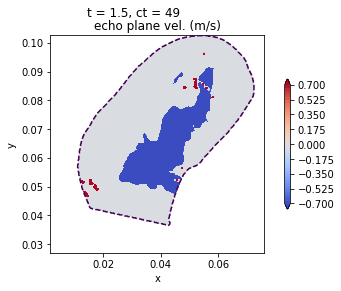

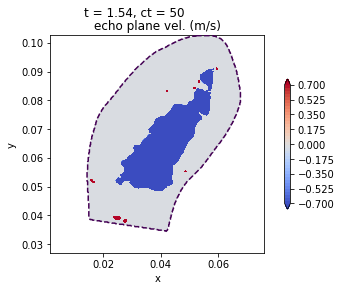

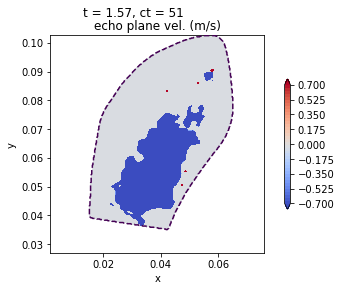

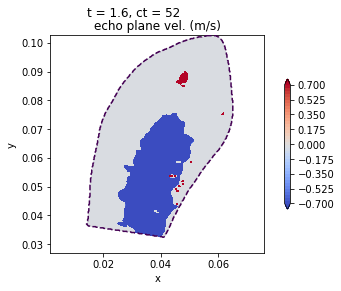

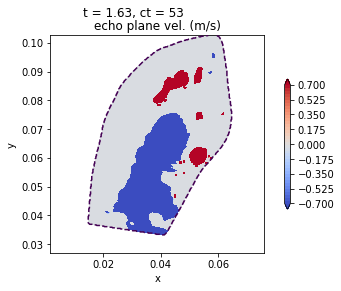

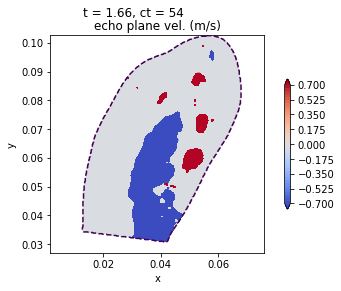

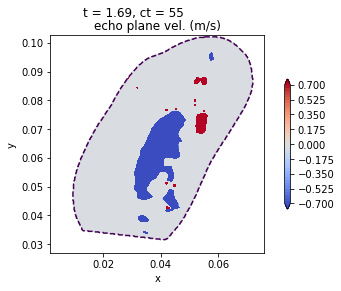

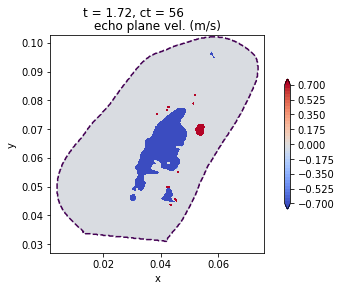

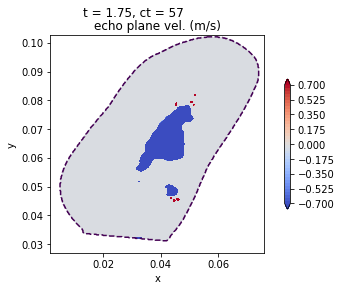

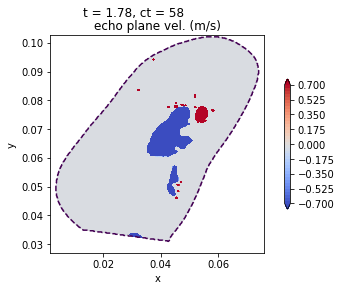

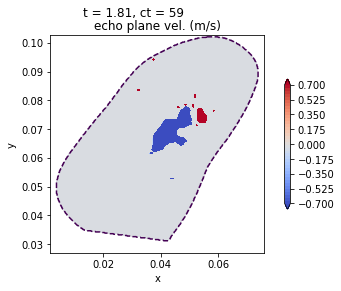

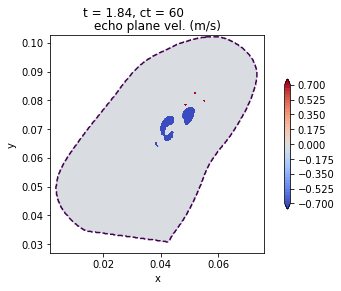

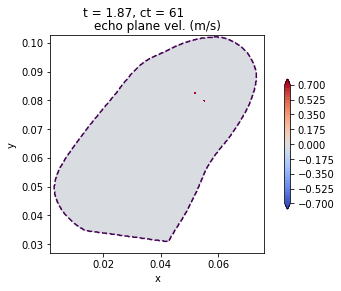

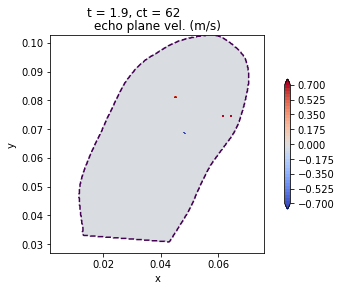

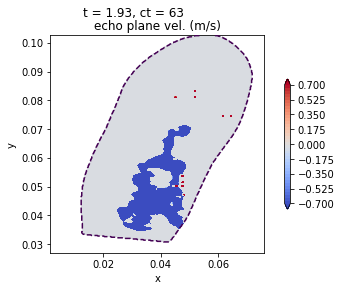

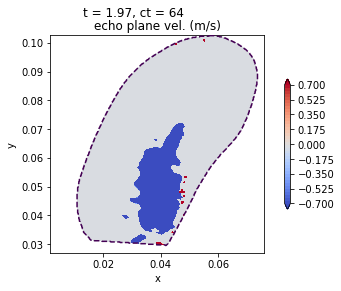

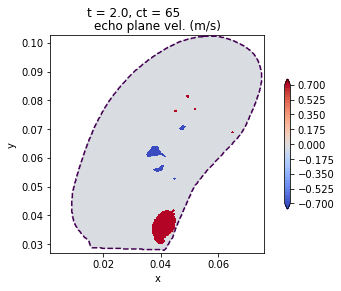

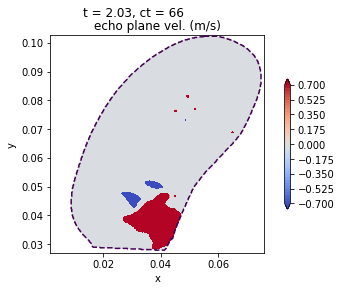

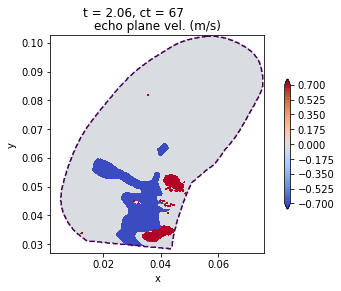

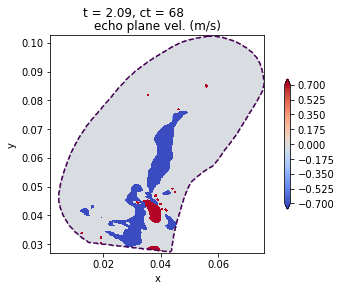

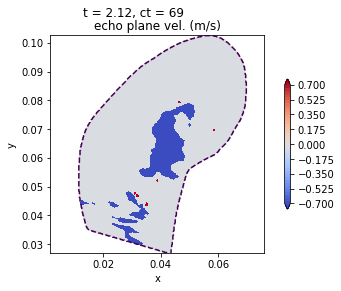

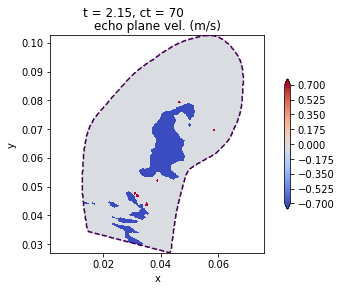

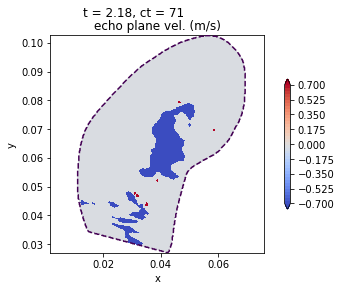

In [51]:
import matplotlib.pyplot as plt
for ct in range(Nt):
  plt.figure(1)
  ax = plt.subplot(1,1,1)
  plt.contourf(Xn_2d_echo_masked, Yn_2d_echo_masked, delias_data_masked_rectangle[:,:,ct], levels=vel_levels, extend='both', cmap='coolwarm') #filtered_data plot korle onek smooth curve ashe since it is smoothened using Gaussian smooting function etc by Brett
  #extend='both' deate maxm and minm both velocity plotted hocche aage maxm thakate only colorbar er bottom region plot hocchilo
  plt.colorbar(shrink=0.6)
  plt.contour(Xn_2d_echo_masked, Yn_2d_echo_masked, mask_echo_cut[:,:,ct], np.array([0.5]), linestyles='dashed', zorder=3) #"lvBCMask" instead of "lvMask"
  #quiver([X, Y], U, V, [C], **kwargs). Here, X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.
  #plt.quiver(Xn_2d_jc[::N_skip, ::N_skip], Yn_2d_jc[::N_skip, ::N_skip], Vproj_1_interp_jc[ct, ::N_skip, ::N_skip], Vproj_2_interp_jc[ct, ::N_skip, ::N_skip], color='k', zorder=3)
  #plt.quiver(Xn_2d_echo[::N_skip, ::N_skip], Yn_2d_echo[::N_skip, ::N_skip], max_vel_data[ct], min_vel_data[ct], color='k', zorder=3)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('echo plane vel. (m/s)')
  ax.set_aspect('equal')
  
  ax.set_aspect('equal')
  plt.suptitle('t = '+str(np.round(ct*dt, 2)) + ', ct = ' + str(ct))
  #plt.savefig(savedir_plot_patient + 'velocity_fields_'+str(ct).zfill(3),dpi=200)
  #plt.clf()
  plt.subplots_adjust(left=0.05,
                    right=0.99,
                    wspace=0.4,
                    hspace=0.9)

  plt.show()

In [ ]:
>> load('Pros NL22 RV 2D and Color.mat')
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,10)));
>> figure(2);imagesc(squeeze(data.lvBCMask(:,:,10)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));colorbar;clim([-70,70]);
Unrecognized function or variable 'clim'.
 
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));colorbar;clim([-70 70]);
Unrecognized function or variable 'clim'.
 
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));colorbar;caxis([-70, 70]);
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));colorbar;colormap('coolwarm');caxis([-70, 70]); #coolwarm
Error using feval
Unrecognized function or variable 'coolwarm'.

Error in colormap (line 96)
        arg = feval(arg);
 
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,26)));colorbar;caxis([-70, 70]);
>> 
#what is time frame no. 26 in matlab , is 25 in python since python indexing starts from 0.
# https://www.mathworks.com/help/matlab/ref/clim.html;jsessionid=b7768b1fb9a03c17d9310dd46fda 

In [ ]:
#MATLAB command window code for Echo CFI data>> load('Pros NL22 RV 2D and Color.mat')
>> figure(1);imagesc(squeeze(delias(:,:,10)));
Unrecognized function or variable 'delias'.
 
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,10)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,20)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,30)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,40)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,50)));
>> figure(2);imagesc(squeeze(data.lvBCMask(:,:,50)));
>> figure(1);imagesc(squeeze(data.velocity.delias(:,:,50)));
>> 